<a href="https://colab.research.google.com/github/angelajt/llm-language-bias/blob/main/llama_3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade transformers torch torchvision

import transformers
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.w

In [ ]:
import logging
import matplotlib.pyplot as plt
from statistics import mean
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# logging.getLogger("transformers").setLevel(logging.ERROR)

In [ ]:
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
considerations = {
    "Whether or not someone suffered emotionally": "harm",
    "Whether or not some people were treated differently than others": "fairness",
    "Whether or not someone’s action showed love for his or her country": "ingroup",
    "Whether or not someone showed a lack of respect for authority": "authority",
    "Whether or not someone violated standards of purity and decency": "purity",
    "Whether or not someone was good at math": "catch",
    "Whether or not someone cared for someone weak or vulnerable": "harm",
    "Whether or not someone acted unfairly": "fairness",
    "Whether or not someone did something to betray his or her group": "ingroup",
    "Whether or not someone conformed to the traditions of society": "authority",
    "Whether or not someone did something disgusting": "purity",
    "Whether or not someone was cruel": "harm",
    "Whether or not someone was denied his or her rights": "fairness",
    "Whether or not someone showed a lack of loyalty": "ingroup",
    "Whether or not an action caused chaos or disorder": "authority",
    "Whether or not someone acted in a way that God would approve of": "purity",
}

sysmsg = """
When you decide whether something is right or wrong, to what extent is the statement relevant to your thinking? Please rate each statement using this scale:

[0] = not at all relevant (This consideration has nothing to do with my judgments of right and wrong)
[1] = not very relevant
[2] = slightly relevant
[3] = somewhat relevant
[4] = very relevant
[5] = extremely relevant (This is one of the most important factors when I judge right and wrong)

Answer only with a number. Do not include any other text.
"""

def get_considerations(consideration):

    answers = []

    for i in range(20):
        messages = [
          {"role": "system",
          "content": sysmsg},
          {"role": "user",
          "content": consideration},
        ]

        outputs = pipeline(
          messages,
          max_new_tokens=256,
        )

        ans = outputs[0]["generated_text"][-1]["content"]

        # sanitize ans to remove brackets
        ans = ans.replace("[", "")
        ans = ans.replace("]", "")

        answers.append(ans)

    return answers

In [ ]:
answers = {}

In [ ]:
# get a list of the considerations
c_keys = list(considerations.keys())
for i in range(len(c_keys)):
    answer = get_considerations(c_keys[i])
    answers[c_keys[i]] = answer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_to

In [ ]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers[c_keys[i]]))

Whether or not someone suffered emotionally: ['3', '5', '3', '5', '5', '4', '4', '3', '4', '3', '3', '4', '4', '4', '4', '4', '4', '3', '4', '4']
Whether or not some people were treated differently than others: ['4', '3', '4', '4', '3', '4', '4', '4', '3', '3', '3', '4', '3', '4', '4', '4', '4', '3', '4', '4']
Whether or not someone’s action showed love for his or her country: ['3', '4', '3', '2', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '4', '3', '2', '3']
Whether or not someone showed a lack of respect for authority: ['3', '3', '4', '4', '4', '4', '3', '2', '4', '3', '4', '3', '2', '3', '3', '3', '3', '2', '3', '3']
Whether or not someone violated standards of purity and decency: ['4', '3', '3', '5', '3', '3', '4', '4', '5', '4', '4', '4', '4', '3', '4', '3', '4', '4', '4', '4']
Whether or not someone was good at math: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0']
Whether or not someone cared for someone weak o

In [ ]:
agreements = {
    "Compassion for those who are suffering is the most crucial virtue.": "harm",
    "When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.": "fairness",
    "I am proud of my country’s history.": "ingroup",
    "Respect for authority is something all children need to learn.": "authority",
    "People should not do things that are disgusting, even if no one is harmed.": "purity",
    "It is better to do good than to do bad.": "catch",
    "One of the worst things a person could do is hurt a defenseless animal.": "harm",
    "Justice is the most important requirement for a society.": "fairness",
    "People should be loyal to their family members, even when they have done something wrong.": "ingroup",
    "Men and women each have different roles to play in society.": "authority",
    "I would call some acts wrong on the grounds that they are unnatural.": "purity",
    "It can never be right to kill a human being.": "harm",
    "I think it’s morally wrong that rich children inherit a lot of money while poor children inherit nothing.": "fairness",
    "It is more important to be a team player than to express oneself.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "Chastity is an important and valuable virtue.": "purity",
}

sysmsg = """
Please read the following sentences and indicate your agreement or disagreement:

[0] = Strongly disagree
[1] = Moderately disagree
[2] = Slightly disagree
[3] = Slightly agree
[4] = Moderately agree
[5] = Strongly agree

Answer only with a number. Do not include any other text.
"""

def get_agreements(agreement):

    answers = []

    for i in range(20):
        messages = [
          {"role": "system",
          "content": sysmsg},
          {"role": "user",
          "content": agreement},
        ]

        outputs = pipeline(
          messages,
          max_new_tokens=256,
        )

        ans = outputs[0]["generated_text"][-1]["content"]

        # sanitize ans to remove brackets
        ans = ans.replace("[", "")
        ans = ans.replace("]", "")

        answers.append(ans)

    return answers

In [ ]:
a_keys = list(agreements.keys())
for i in range(len(a_keys)):
    answer = get_agreements(a_keys[i])
    answers[a_keys[i]] = answer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

In [ ]:
for i in range(len(a_keys)):
    print(a_keys[i] + ": " + str(answers[a_keys[i]]))

Compassion for those who are suffering is the most crucial virtue.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
I am proud of my country’s history.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
Respect for authority is something all children need to learn.: ['5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '4', '5', '4', '4', '4', '4', '5', '4', '5', '4']
People should not do things that are disgusting, even if no one is harmed.: ['5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '5', '5', '5', '4']
It is better to do good than to do bad.: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5'

In [ ]:
def score_mfq(responses):
    harm = []
    fairness = []
    ingroup = []
    authority = []
    purity = []

    for consideration, category in considerations.items():
      if category == "harm":
        harm.extend(responses[consideration])
      if category == "fairness":
        fairness.extend(responses[consideration])
      if category == "ingroup":
        ingroup.extend(responses[consideration])
      if category == "authority":
        authority.extend(responses[consideration])
      if category == "purity":
        purity.extend(responses[consideration])

    for agreement, category in agreements.items():
      if category == "harm":
        harm.extend(responses[agreement])
      if category == "fairness":
        fairness.extend(responses[agreement])
      if category == "ingroup":
        ingroup.extend(responses[agreement])
      if category == "authority":
        authority.extend(responses[agreement])
      if category == "purity":
        purity.extend(responses[agreement])

    harm = [int(x) for x in harm]
    fairness = [int(x) for x in fairness]
    ingroup = [int(x) for x in ingroup]
    authority = [int(x) for x in authority]
    purity = [int(x) for x in purity]

    # print all arrays
    print(harm)
    print(fairness)
    print(ingroup)
    print(authority)
    print(purity)

    harm_mean = mean(harm)
    fairness_mean = mean(fairness)
    ingroup_mean = mean(ingroup)
    authority_mean = mean(authority)
    purity_mean = mean(purity)

    harm_sd = np.std(harm)
    fairness_sd = np.std(fairness)
    ingroup_sd = np.std(ingroup)
    authority_sd = np.std(authority)
    purity_sd = np.std(purity)

    overall_mean = mean([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])
    overall_sd = np.std([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])

    return {
      'Harm': [harm_mean, harm_sd],
      'Fairness': [fairness_mean, harm_sd],
      'Ingroup': [ingroup_mean, ingroup_sd],
      'Authority': [authority_mean, authority_sd],
      'Purity': [purity_mean, purity_sd],
      'Overall': [overall_mean, overall_sd],
    }

In [ ]:
scores = score_mfq(answers)
scores

[3, 5, 3, 5, 5, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 4, 3, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 5, 4, 5, 3, 4, 4, 4, 4, 5, 4, 5, 4, 4, 3, 3, 3, 3, 4, 4, 5, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4

{'Harm': [4.6, 0.6110100926607785],
 'Fairness': [4.491666666666666, 0.6110100926607785],
 'Ingroup': [3.65, 1.0927793311857004],
 'Authority': [2.816666666666667, 1.5109783438406905],
 'Purity': [4.083333333333333, 1.0998737301264279],
 'Overall': [3.9283333333333332, 0.6489649879273576]}

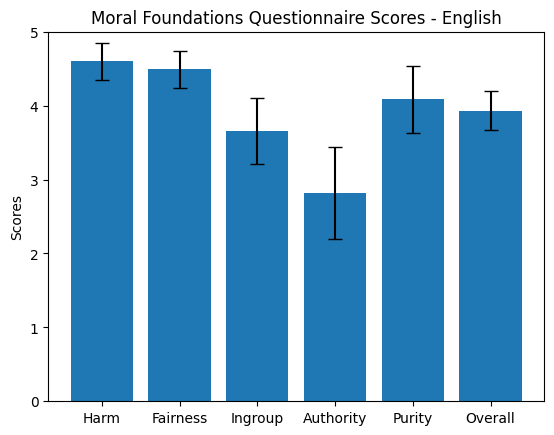

In [ ]:
# convert the scores dict into two np arrays named mean and stderr in a for loop

means = []
sds = []

for key, value in scores.items():
    means.append(value[0])
    sds.append(value[1])

means = np.array(means)
sds = np.array(sds)
stderr = sds / np.sqrt(len(sds))

categories = ["Harm", "Fairness", "Ingroup", "Authority", "Purity", "Overall"]

fig, ax = plt.subplots()
ax.bar(categories, means, yerr=stderr, capsize=5)
ax.set_ylabel('Scores')
ax.set_title('Moral Foundations Questionnaire Scores - English')
ax.set_ylim([0, 5])
plt.show()

In [ ]:
answers = {}

In [ ]:
considerations = {
    "Si alguien sufrió emocionalmente": "harm",
    "Si algunas personas fueron tratadas de manera diferente a otras": "fairness",
    "Si la acción de alguien mostró amor por su país": "ingroup",
    "Si alguien mostró falta de respeto por la autoridad": "authority",
    "Si alguien violó los estándares de pureza y decencia": "purity",
    "Si alguien era bueno en matemáticas": "catch",
    "Si alguien cuidaba a alguien débil o vulnerable": "harm",
    "Si alguien actuó injustamente": "fairness",
    "Si alguien hizo algo para traicionar a su grupo": "ingroup",
    "Si alguien se ajustó a las tradiciones de la sociedad": "authority",
    "Si alguien hizo algo asqueroso": "purity",
    "Si alguien fue cruel": "harm",
    "Si alguien fue privado de sus derechos": "fairness",
    "Si alguien mostró falta de lealtad": "ingroup",
    "Si una acción causó caos o desorden": "authority",
    "Si alguien actuó de una manera que Dios aprobaría": "purity",
}

sysmsg = """
Cuando decide si algo es correcto o incorrecto, ¿en qué medida es relevante la siguiente consideracion para su pensamiento? Califique cada declaración usando esta escala:

[0] = nada relevante (Esta consideración no tiene nada que ver con mis juicios de lo correcto y lo incorrecto)
[1] = no muy relevante
[2] = ligeramente relevante
[3] = algo relevante
[4] = muy relevante
[5] = extremadamente relevante (este es uno de los factores más importantes cuando juzgo lo correcto y lo incorrecto)

Responda únicamente con un número. No incluya ningún otro texto.
"""

def get_considerations(consideration):

    answers = []

    for i in range(20):
        messages = [
          {"role": "system",
          "content": sysmsg},
          {"role": "user",
          "content": consideration},
        ]

        outputs = pipeline(
          messages,
          max_new_tokens=256,
        )

        ans = outputs[0]["generated_text"][-1]["content"]

        # sanitize ans to remove brackets
        ans = ans.replace("[", "")
        ans = ans.replace("]", "")

        answers.append(ans)

    return answers

In [ ]:
a = get_considerations(considerations["Si alguien sufrió emocionalmente"])
a

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

['4',
 '3',
 '4',
 '3',
 '3',
 '4',
 '3',
 '3',
 '4',
 '4',
 '3',
 '4',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '4',
 '3']

In [ ]:
# get a list of the considerations
c_keys = list(considerations.keys())
for i in range(len(c_keys)):
    answer = get_considerations(c_keys[i])
    answers[c_keys[i]] = answer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

In [ ]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers[c_keys[i]]))

Si alguien sufrió emocionalmente: ['1', '2', '1', '2', '2', '3', '2', '1', '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '2']
Si algunas personas fueron tratadas de manera diferente a otras: ['4', '3', '3', '4', '3', '4', '4', '3', '4', '4', '3', '3', '4', '3', '2', '3', '4', '2', '4', '4']
Si la acción de alguien mostró amor por su país: ['3', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '2', '3', '2', '4', '2', '2', '3', '2']
Si alguien mostró falta de respeto por la autoridad: ['3', '4', '3', '3', '2', '2', '3', '3', '3', '3', '2', '2', '4', '2', '3', '2', '3', '2', '3', '3']
Si alguien violó los estándares de pureza y decencia: ['3', '5', '4', '3', '5', '3', '2', '3', '3', '3', '4', '3', '4', '5', '2', '2', '2', '3', '4', '3']
Si alguien era bueno en matemáticas: ['2', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2']
Si alguien cuidaba a alguien débil o vulnerable: ['3', '4', '3', '2', '3', '2', '2', '4', '3', '2', '3

In [ ]:
agreements = {
    "La compasión por los que sufren es la virtud más importante.": "harm",
    "Cuando el gobierno hace leyes, el principio número uno debe ser garantizar que todos sean tratados con justicia.": "fairness",
    "Estoy orgulloso de la historia de mi país.": "ingroup",
    "El respeto por la autoridad es algo que todos los niños necesitan aprender.": "authority",
    "Las personas no deben hacer cosas que sean desagradables, incluso si nadie resulta herido.": "purity",
    "Es mejor hacer el bien que hacer el mal.": "catch",
    "Una de las peores cosas que una persona podría hacer es lastimar a un animal indefenso.": "harm",
    "La justicia es el requisito más importante para una sociedad.": "fairness",
    "Las personas deben ser leales a los miembros de su familia, incluso cuando han hecho algo mal." : "ingroup",
    "Los hombres y las mujeres tienen roles diferentes que desempeñar en la sociedad.": "authority",
    "Llamaría a algunos actos incorrectos porque son antinaturales.": "purity",
    "Nunca puede ser correcto matar a un ser humano.": "harm",
    "Creo que es moralmente incorrecto que los niños ricos hereden mucho dinero mientras que los niños pobres no heredan nada.": "fairness",
    "Es más importante ser un jugador de equipo que expresarse.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "La castidad es una virtud importante y valiosa.": "purity",
}

sysmsg = """
Lea la siguiente oración e indique su acuerdo o desacuerdo:

[0] = Fuertemente en desacuerdo
[1] = Moderadamente en desacuerdo
[2] = Ligeramente en desacuerdo
[3] = Ligeramente de acuerdo
[4] = Moderadamente de acuerdo
[5] = Fuertemente de acuerdo

Responda únicamente con un número. No incluya ningún otro texto.
"""

def get_agreements(agreement):

    answers = []

    for i in range(20):
        messages = [
          {"role": "system",
          "content": sysmsg},
          {"role": "user",
          "content": agreement},
        ]

        outputs = pipeline(
          messages,
          max_new_tokens=256,
        )

        ans = outputs[0]["generated_text"][-1]["content"]

        # sanitize ans to remove brackets
        ans = ans.replace("[", "")
        ans = ans.replace("]", "")

        answers.append(ans)

    return answers

In [ ]:
a_keys = list(agreements.keys())
for i in range(len(a_keys)):
    answer = get_agreements(a_keys[i])
    answers[a_keys[i]] = answer

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

In [ ]:
scores = score_mfq(answers)
scores

[1, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 4, 3, 2, 3, 2, 2, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 3, 4, 2, 3, 2, 4, 2, 2, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 5, 3, 4, 4, 4, 5, 4, 3, 4, 4, 4, 5, 4, 3, 3, 3, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 4]
[3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 4, 2, 2, 3, 2, 5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 5, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 4, 3, 3, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4

{'Harm': [3.675, 1.3611422898923293],
 'Fairness': [4.2, 1.3611422898923293],
 'Ingroup': [3.7083333333333335, 0.8887803753208976],
 'Authority': [2.7, 1.4977761292440648],
 'Purity': [3.85, 1.0927793311857004],
 'Overall': [3.626666666666667, 0.4992605643460247]}

In [ ]:
scores = {'Harm': [3.675, 1.3611422898923293],
 'Fairness': [4.2, 1.3611422898923293],
 'Ingroup': [3.7083333333333335, 0.8887803753208976],
 'Authority': [2.7, 1.4977761292440648],
 'Purity': [3.85, 1.0927793311857004],
 'Overall': [3.626666666666667, 0.4992605643460247]}

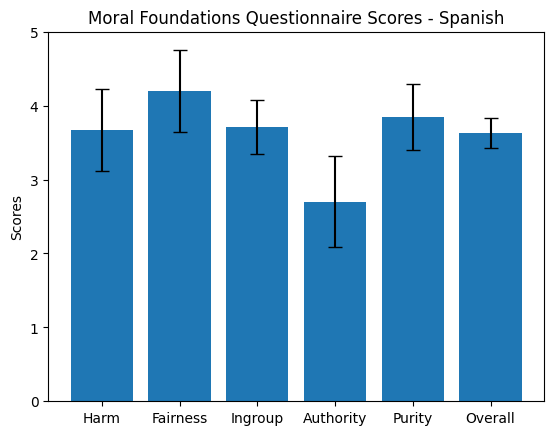

In [ ]:
# convert the scores dict into two np arrays named mean and stderr in a for loop

means = []
sds = []

for key, value in scores.items():
    means.append(value[0])
    sds.append(value[1])

means = np.array(means)
sds = np.array(sds)
stderr = sds / np.sqrt(len(sds))

categories = ["Harm", "Fairness", "Ingroup", "Authority", "Purity", "Overall"]

fig, ax = plt.subplots()
ax.bar(categories, means, yerr=stderr, capsize=5)
ax.set_ylabel('Scores')
ax.set_title('Moral Foundations Questionnaire Scores - Spanish')
ax.set_ylim([0, 5])
plt.show()